## Dependencies

In [1]:
import numpy as np
import pandas as pd 
import pprint as pp

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
# traning data
train = pd.read_csv('Data/traning_data_normalized.csv')
train.sample(5)

,ID,protein_sequence,length,tm,f1,f2,f3,f4,f5,f6,...,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578
14952,21404,MVRMNVLADALKCINNAEKRGKRQVLLRPCSKVIIKFLTVMMKHGY...,129,45.1,0.084059,0.010438,-0.739161,-0.688859,-0.483975,-0.841861,...,-1.181165,0.951218,2.328981,-0.835613,-0.935843,-1.067777,0.981224,-0.440417,2.274455,2.197642
15381,6829,MDSNKLYYVVGLAGAGKTTVCKQLAECIDGGAAPQTSGRFMDFIKK...,368,37.4,-0.315977,-0.351435,0.112751,-0.448752,1.303280,-0.157777,...,-0.180674,-0.344735,-0.668458,0.052153,-0.935843,-0.366609,1.075990,-0.440417,1.358420,0.638165
1855,4452,MAMMTTTTTTFFHPLLPANTYKSGAVASSFVSVPRSSSLQFRSLVS...,324,45.3,0.359313,-0.073882,-0.262623,-0.091592,-0.351328,0.357087,...,2.797595,-1.038803,-0.668458,1.181800,-0.935843,0.525600,0.556884,-0.440417,-0.754250,-1.072810
4995,19651,MSYQGKKNIPRITSDRLLIKGGKIVNDDQSFYADIYMEDGLIKQIG...,571,59.2,-0.470119,-0.699256,-0.464952,-0.442749,-0.483975,-0.546625,...,0.107177,-0.145032,0.004657,0.879188,0.048142,1.189481,-0.145731,-0.440417,-0.074114,0.396016
6499,2439,MAAAGARGLRATYHRLMDKVELLLPKKLRPLYNHPAGPRTVFFWAP...,126,47.7,0.495104,0.414472,-0.616699,0.070480,-0.344346,-0.643837,...,1.756273,0.998979,-0.668458,1.770863,-0.935843,-1.067777,3.125179,-0.440417,-0.754250,-1.072810


In [3]:
# testing data
test = pd.read_csv('Data/testing_data_normalized.csv')
test.sample(5)

,ID,protein_sequence,length,tm,f1,f2,f3,f4,f5,f6,...,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578
887,20490,MTRHSDPTQVQLTADGRLKHFLTTEGLSKALLTEILDLADSFISTQ...,335,44.7,0.326282,0.172052,-0.813703,-0.406733,-0.595679,-0.561027,...,-1.181165,-0.276163,-0.668458,0.139861,-0.935843,-0.297336,0.503465,-0.440417,-0.75425,0.180532
956,13887,MNESEIPIDIHTLKLQDWLISRRIVPKNVQQELREIHRKISNALQD...,508,49.2,-0.730692,-0.267115,1.177641,-0.445750,-0.539827,-0.319797,...,-0.094827,-1.038803,-0.668458,0.449640,0.170411,-0.052668,-0.031561,-0.440417,-0.75425,-0.247128
2675,14054,MNISGDFESESDYERCLEFLGDINNIMSCMPLYDISISDKINAKIK...,145,70.1,1.526388,0.871206,0.828889,-0.973986,0.748253,-0.312596,...,-1.181165,-1.038803,-0.668458,-0.835613,-0.935843,0.719213,-1.064536,-0.440417,-0.75425,0.380715
132,12609,MLSYIKRKLSESDSGVSSVATVTSSCGGDSGRAGGTGSSESGTGSS...,217,41.0,-0.022373,0.228265,0.783631,0.907854,0.730800,2.290527,...,0.518749,0.140461,-0.668458,0.672755,-0.935843,1.314903,1.360079,-0.440417,-0.75425,0.865245
4418,1472,GPEAIECWFVEDAGGGGLSKKPATLLLRHGPRGPPPRPDLDPKLYF...,442,49.9,-0.117794,0.017465,-0.733837,0.841825,-0.476994,-0.672640,...,-0.348567,0.693999,-0.668458,-0.096807,0.971862,0.099232,1.310588,-0.440417,0.12484,0.351056


In [4]:
# list of features
features = list(train.columns)[4:]
response_variable = 'tm'

# training data
x_train = train[features].to_numpy()
y_train = train[response_variable].to_numpy()

# testing data
x_test = test[features].to_numpy()
y_test = test[response_variable].to_numpy()

## Train/Test Pipeline Function

In [7]:
def regressor_pipline(model_name, train_x, train_y, test_x, test_y, model):
    ''' Function to TRAIN and TEST a regressor model.'''
    
    # training model
    experimental_model = model.fit(train_x, train_y)
    
    # training/tetsing  prediction
    train_prediction = experimental_model.predict(train_x)
    test_prediction = experimental_model.predict(test_x)
    
    print(model_name + "\n")

    print('Training Prediction Evaluation: \n')
    evaluate_reg_predictions(train_y, train_prediction)

    print('Testing Prediction Evaluation: \n')
    evaluate_reg_predictions(test_y, test_prediction)
    
    return experimental_model

from matplotlib.collections import LineCollection

def evaluate_reg_predictions(y_true, y_pred): 
    '''Function to EVALUATE a regressor model.'''
    
    # calculating the evaluation metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # printing calculated metrics
    print('\tMSE: ', mse)
    print('\tRMSE: ', rmse)
    print('\tMAE: ', mae)
    print('\tR2: ', r2)
    
    
    # plotting the true vs predicted values
    plt.scatter(y_true, y_pred, c='black', s=0.5)

    # adding 1/1 line
    line = [(0, 0), (120, 120)]
    lc = LineCollection([line], color=["red"], lw=2)
    plt.gca().add_collection(lc)

    plt.show()

## Multiple Linear Regression

Multiple Lenear Regression

Traning Prediction Evaluation: 

	MSE:  73.89944688351304
	RMSE:  8.596478749087503
	MAE:  6.601870289744905
	R2:  0.5618907127363371


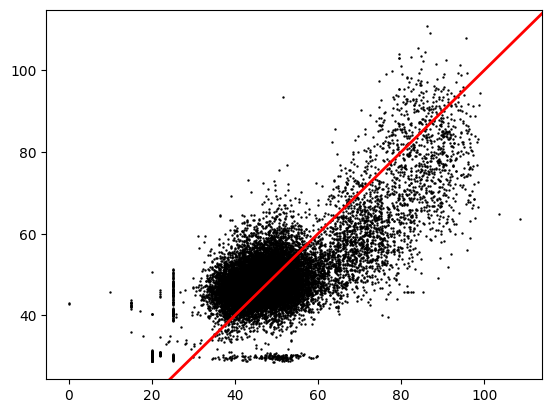

Testing Prediction Evaluation: 

	MSE:  80.67549395542376
	RMSE:  8.981953793881583
	MAE:  6.861408268545967
	R2:  0.5241836697577554


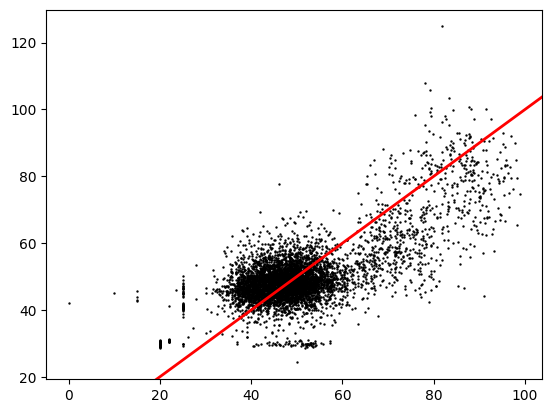

In [51]:
regressor_pipline('Multiple Lenear Regression', x_train, y_train, 
                  x_test, y_test, LinearRegression())

## Ridge Regression

Ridge Regression

Traning Prediction Evaluation: 

	MSE:  73.9791883349778
	RMSE:  8.60111552852174
	MAE:  6.6029852683431765
	R2:  0.5614179694082082


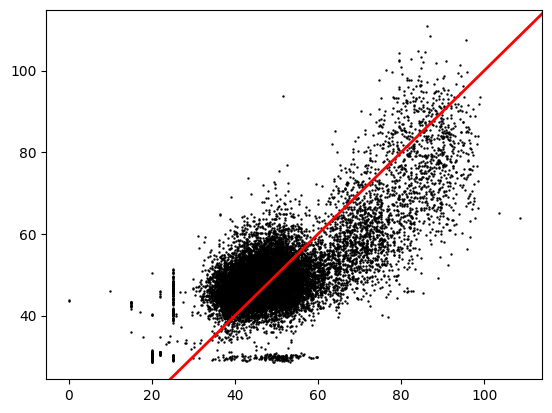

Testing Prediction Evaluation: 

	MSE:  80.58399059845095
	RMSE:  8.976858615264637
	MAE:  6.85866156107049
	R2:  0.5247233477861751


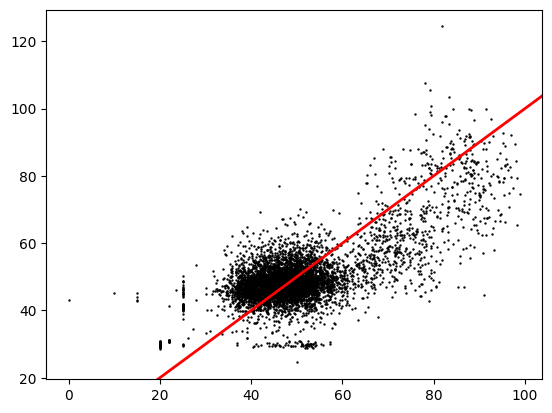

In [52]:
regressor_pipline('Ridge Regression', x_train, y_train, 
                  x_test, y_test, Ridge())

## Lasso Regression

Lasso Regression

Traning Prediction Evaluation: 

	MSE:  105.62624982132544
	RMSE:  10.277463199706698
	MAE:  7.639517533226321
	R2:  0.3737999000385125


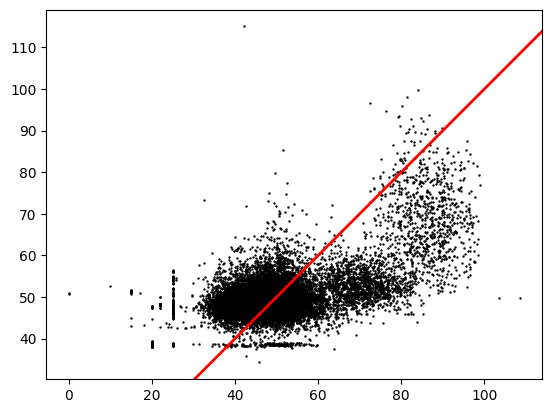

Testing Prediction Evaluation: 

	MSE:  105.95283093537297
	RMSE:  10.293339153810729
	MAE:  7.6454211479814
	R2:  0.375100359195795


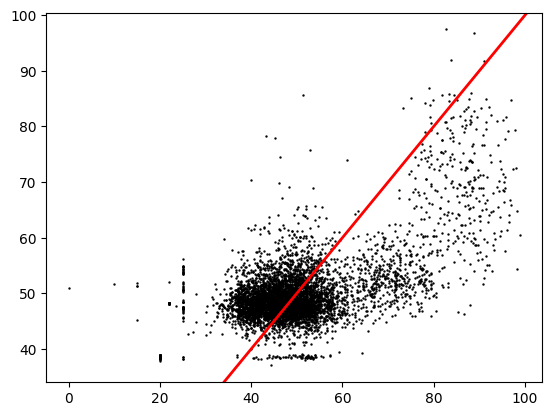

In [53]:
regressor_pipline('Lasso Regression', x_train, y_train, 
                  x_test, y_test, linear_model.Lasso())

## Decision Tree Regressor

Decision Tree Regression

Traning Prediction Evaluation: 

	MSE:  3.2467908331438964
	RMSE:  1.8018853551610592
	MAE:  0.24599928013942562
	R2:  0.9807515579914278


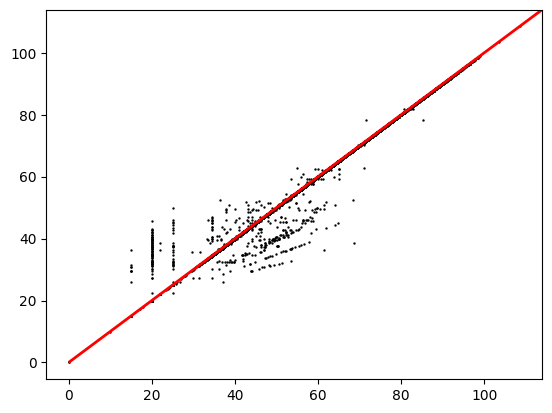

Testing Prediction Evaluation: 

	MSE:  137.44547176904572
	RMSE:  11.723714077417862
	MAE:  8.304966189339698
	R2:  0.18935978226923966


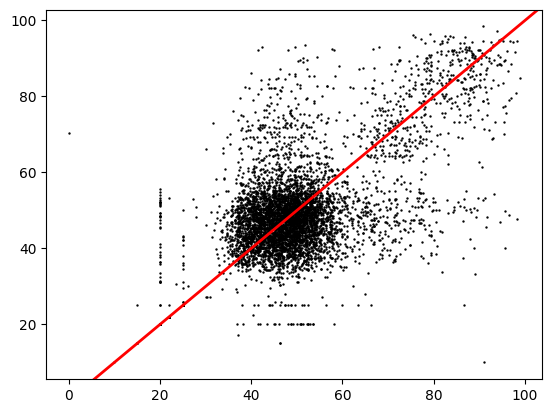

In [54]:
regressor_pipline('Decision Tree Regression', x_train, y_train, 
                  x_test, y_test, DecisionTreeRegressor(max_depth=600))

## Random Forest Regressor

Random Forest Regression

Traning Prediction Evaluation: 

	MSE:  25.901228388243972
	RMSE:  5.089324944257733
	MAE:  3.909703589799941
	R2:  0.8464458235213319


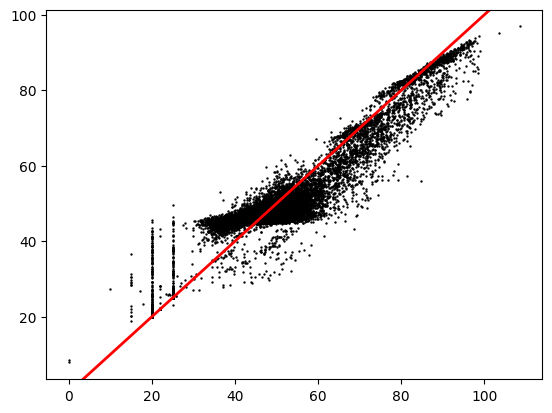

Testing Prediction Evaluation: 

	MSE:  65.79677683055772
	RMSE:  8.11152124022108
	MAE:  5.9213124792646195
	R2:  0.6119369171686472


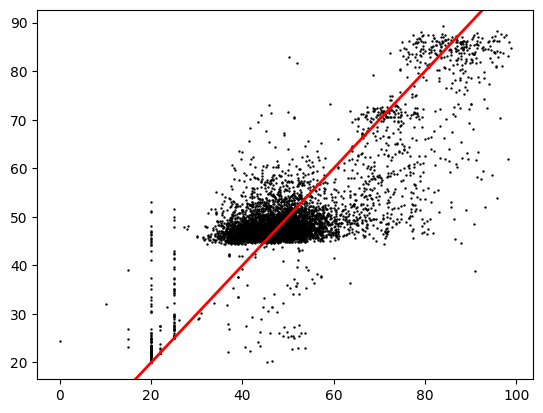

In [57]:
regressor_pipline('Random Forest Regression', x_train, y_train, 
                  x_test, y_test, RandomForestRegressor(max_depth=20, n_estimators=200))

## Cross Validation for Random Forest Regressors

Searching for optimal hyperparameters: <b>number of estimators</b> (decision trees) and <b>maximum depth of decision tree<b/>.

In [6]:
def cross_validation_random_forest(train_x, train_y, model, list_num_est, list_max_depth, split): 
    
    results_table = pd.DataFrame()
    
    num_ests = []
    max_depths = []
    avg_test_mse = []
    avg_test_mae = []
    
    test_size = len(train_x) // split
    
    for num_est in list_num_est: 
        for depth in list_max_depth: 
            
            mse_list = []
            mae_list = []
            
            for i in range(split): 
                start = i*test_size 
                end = i*test_size + test_size
                
                experimental_test_x = train_x[start: end]
                experimental_test_y = train_y[start: end]
                experimental_train_x = np.concatenate((train_x[0: start], train_x[end: -1]), axis=0)
                experimental_train_y = np.concatenate((train_y[0: start], train_y[end: -1]), axis=0)
                
                regressor = model(max_depth=depth,n_estimators=num_est).fit(experimental_train_x, experimental_train_y)
                
                predicted = regressor.predict(experimental_test_x)
                
                mse = mean_squared_error(experimental_test_y, predicted)
                mse_list.append(mse)
                mae = mean_absolute_error(experimental_test_y, predicted)
                mae_list.append(mae)
                
            print("Estimators: " + str(num_est) + '  Depth: ' + str(depth))
            print(np.mean(np.array(mse_list)), np.mean(np.array(mae_list)))
            num_ests.append(num_est)
            max_depths.append(depth)
            avg_test_mse.append(np.mean(np.array(mse_list)))
            avg_test_mae.append(np.mean(np.array(mae_list)))
            
            
    results_table['Number Estimators'] = num_ests
    results_table['Max Depth'] = max_depths
    results_table['Test MSE'] = avg_test_mse
    results_table['Test MAE'] = avg_test_mae
                                
    return results_table
    

In [7]:
cross_validation_random_forest(x_train, y_train, RandomForestRegressor, [25, 50, 100, 200], [1, 5, 10, 20], 4)

Estimators: 25  Depth: 1
131.98825284437834 7.969936270536936
Estimators: 25  Depth: 5
84.96384390518845 6.7084323231087195
Estimators: 25  Depth: 10
73.26862674041679 6.283642060735059
Estimators: 25  Depth: 20
69.28616882300663 6.11031608171041
Estimators: 50  Depth: 1
131.9436639164621 7.965680337806163
Estimators: 50  Depth: 5
85.05780565485213 6.71638613825125
Estimators: 50  Depth: 10
72.30619331839651 6.258164126862875
Estimators: 50  Depth: 20
68.35639356566536 6.078193514969792
Estimators: 100  Depth: 1
131.99619165845286 7.970795249310557
Estimators: 100  Depth: 5
84.84041215154787 6.707800888078539
Estimators: 100  Depth: 10
71.99822306039044 6.251123506375627
Estimators: 100  Depth: 20
67.49576191438616 6.044182312118378
Estimators: 200  Depth: 1
132.04687679105052 7.96492522823106
Estimators: 200  Depth: 5
84.8547856475109 6.70945283811077
Estimators: 200  Depth: 10
71.92087362838922 6.246436423316843
Estimators: 200  Depth: 20
67.25183283817859 6.034685084542474


,Number Estimators,Max Depth,Test MSE,Test MAE
0,25,1,131.988253,7.969936
1,25,5,84.963844,6.708432
2,25,10,73.268627,6.283642
3,25,20,69.286169,6.110316
4,50,1,131.943664,7.965680
5,50,5,85.057806,6.716386
6,50,10,72.306193,6.258164
7,50,20,68.356394,6.078194
8,100,1,131.996192,7.970795
9,100,5,84.840412,6.707801


## Support Vector Regression

Support Vector Regression

Traning Prediction Evaluation: 

	MSE:  75.73223378666978
	RMSE:  8.702426890624809
	MAE:  5.906335336709893
	R2:  0.5510251244577958


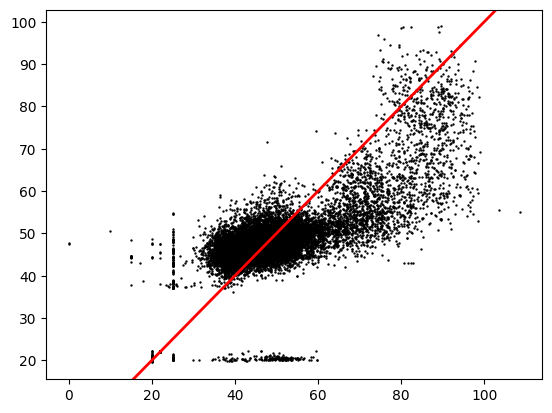

Testing Prediction Evaluation: 

	MSE:  84.24235523562217
	RMSE:  9.178363429044536
	MAE:  6.504254758772979
	R2:  0.5031466638267486


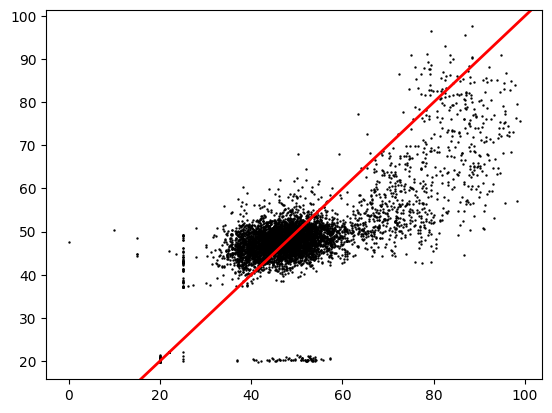

In [61]:
regressor_pipline('Support Vector Regression', x_train, y_train,
                  x_test, y_test, SVR())

## Cross Validation for Neural Network (activation function)

In [15]:
# activation function selection
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

def cross_validation_mlp(act_funcs,train_x, train_y, split): 
    
    results_table = pd.DataFrame()
    
    activation_functions = []
    avg_test_mse = []
    avg_test_mae = []
    
    test_size = len(train_x) // split
    
    for af in act_funcs: 
            
        mse_list = []
        mae_list = []

        for i in range(split): 
            start = i*test_size 
            end = i*test_size + test_size

            experimental_test_x = train_x[start: end]
            experimental_test_y = train_y[start: end]
            experimental_train_x = np.concatenate((train_x[0: start], train_x[end: -1]), axis=0)
            experimental_train_y = np.concatenate((train_y[0: start], train_y[end: -1]), axis=0)

            regressor = MLPRegressor(activation=af, hidden_layer_sizes=(100,)).fit(experimental_train_x, experimental_train_y)

            predicted = regressor.predict(experimental_test_x)

            mse = mean_squared_error(experimental_test_y, predicted)
            mse_list.append(mse)
            mae = mean_absolute_error(experimental_test_y, predicted)
            mae_list.append(mae)

        print("Activation Function: " + af)
        print(np.mean(np.array(mse_list)), np.mean(np.array(mae_list)))
        avg_test_mse.append(np.mean(np.array(mse_list)))
        avg_test_mae.append(np.mean(np.array(mae_list)))

            
    results_table['Activation Function'] = act_funcs
    results_table['Test MSE'] = avg_test_mse
    results_table['Test MAE'] = avg_test_mae
                                
    return results_table

In [16]:
cross_validation_mlp(activation_functions,x_train, y_train, 4)

Activation Function: identity
91.58479635391805 7.290081399052084


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

Activation Function: logistic
69.918444727289 6.379089937902529
Activation Function: tanh
108.36349768577415 7.931122966954025


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: relu
114.39593459780316 8.178930369741819


,Activation Function,Test MSE,Test MAE
0,identity,91.584796,7.290081
1,logistic,69.918445,6.379090
2,tanh,108.363498,7.931123
3,relu,114.395935,8.178930


## Cross Validation for Neural Network (Number of Iterations) 

In [6]:
iterations = [10, 25, 50, 100, 150, 200, 300, 400]
split = 4

results_table = pd.DataFrame()

avg_test_mse = []
avg_test_mae = []

test_size = len(x_train) // split

for m_iter in iterations: 

    mse_list = []
    mae_list = []

    for i in range(split): 
        start = i*test_size 
        end = i*test_size + test_size

        experimental_test_x = x_train[start: end]
        experimental_test_y = y_train[start: end]
        experimental_train_x = np.concatenate((x_train[0: start], x_train[end: -1]), axis=0)
        experimental_train_y = np.concatenate((y_train[0: start], y_train[end: -1]), axis=0)

        regressor = MLPRegressor(activation='logistic', 
                                 hidden_layer_sizes=(100,), 
                                max_iter=m_iter).fit(experimental_train_x, experimental_train_y)

        predicted = regressor.predict(experimental_test_x)

        mse = mean_squared_error(experimental_test_y, predicted)
        mse_list.append(mse)
        mae = mean_absolute_error(experimental_test_y, predicted)
        mae_list.append(mae)

    print("Maximum Iterations: " + str(m_iter))
    print(np.mean(np.array(mse_list)), np.mean(np.array(mae_list)))
    avg_test_mse.append(np.mean(np.array(mse_list)))
    avg_test_mae.append(np.mean(np.array(mae_list)))


results_table['Maximum Iterations'] = iterations
results_table['Test MSE'] = avg_test_mse
results_table['Test MAE'] = avg_test_mae


results_table

Maximum Iterations: 10
322.73778743964743 13.775451107638151
Maximum Iterations: 25
91.45157840147027 7.150478486993837
Maximum Iterations: 50
71.4717398121872 6.4616019101922335
Maximum Iterations: 100
68.84074636717966 6.336742010757667
Maximum Iterations: 150
69.30649544995762 6.367867162588443
Maximum Iterations: 200
69.95197406878646 6.382261307176424
Maximum Iterations: 300
70.56039575021317 6.423521183717178
Maximum Iterations: 400
71.22409054745052 6.451007139476056


,Maximum Iterations,Test MSE,Test MAE
0,10,322.737787,13.775451
1,25,91.451578,7.150478
2,50,71.471740,6.461602
3,100,68.840746,6.336742
4,150,69.306495,6.367867
5,200,69.951974,6.382261
6,300,70.560396,6.423521
7,400,71.224091,6.451007


In [5]:
hidden_layers_list = [10, 25, 50, 100, 150, 200, 300]
split = 4

results_table = pd.DataFrame()

avg_test_mse = []
avg_test_mae = []

test_size = len(x_train) // split

for layers in hidden_layers_list: 

    mse_list = []
    mae_list = []

    for i in range(split): 
        start = i*test_size 
        end = i*test_size + test_size

        experimental_test_x = x_train[start: end]
        experimental_test_y = y_train[start: end]
        experimental_train_x = np.concatenate((x_train[0: start], x_train[end: -1]), axis=0)
        experimental_train_y = np.concatenate((y_train[0: start], y_train[end: -1]), axis=0)

        regressor = MLPRegressor(activation='logistic', 
                                 hidden_layer_sizes=(layers,), 
                                max_iter=100).fit(experimental_train_x, experimental_train_y)

        predicted = regressor.predict(experimental_test_x)

        mse = mean_squared_error(experimental_test_y, predicted)
        mse_list.append(mse)
        mae = mean_absolute_error(experimental_test_y, predicted)
        mae_list.append(mae)

    print("Hidden Layers: " + str(layers))
    print(np.mean(np.array(mse_list)), np.mean(np.array(mae_list)))
    avg_test_mse.append(np.mean(np.array(mse_list)))
    avg_test_mae.append(np.mean(np.array(mae_list)))


results_table['Hidden Layers'] = hidden_layers_list
results_table['Test MSE'] = avg_test_mse
results_table['Test MAE'] = avg_test_mae


results_table

Hidden Layers: 10
137.04040116617924 7.842253181980058
Hidden Layers: 25
83.85844878536426 7.034646001065232
Hidden Layers: 50
72.72431256290446 6.54588663013638
Hidden Layers: 100
69.12140060042057 6.35065997193444
Hidden Layers: 150
67.89755995874884 6.284635827987975
Hidden Layers: 200
66.60633309604263 6.205634963975729
Hidden Layers: 300
66.0542088639369 6.18135933606678


,Hidden Layers,Test MSE,Test MAE
0,10,137.040401,7.842253
1,25,83.858449,7.034646
2,50,72.724313,6.545887
3,100,69.121401,6.350660
4,150,67.897560,6.284636
5,200,66.606333,6.205635
6,300,66.054209,6.181359


## Neural Network

Multiple Layer Perceptron

Training Prediction Evaluation: 

	MSE:  18.15409299556297
	RMSE:  4.260762020526724
	MAE:  2.8561139896198564
	R2:  0.8923743400171678


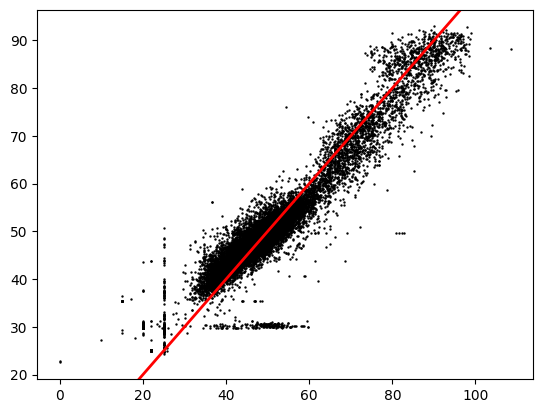

Testing Prediction Evaluation: 

	MSE:  63.538639858225324
	RMSE:  7.971112836877002
	MAE:  6.025044014744679
	R2:  0.6252551925789374


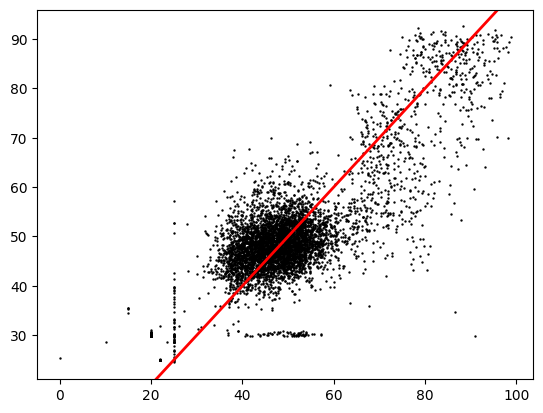

MLPRegressor(activation='logistic', hidden_layer_sizes=(300,), max_iter=100)

In [8]:
regressor_pipline('Multiple Layer Perceptron', x_train, y_train,
                  x_test, y_test, MLPRegressor(activation='logistic', 
                                               hidden_layer_sizes=(300,),
                                               learning_rate='constant',
                                               max_iter=100))

## Evaluating the Best Prediction Model
Testing usefulness of the best performing ML model (Random Forest Ensemble) 

Multiple Layer Perceptron

Training Prediction Evaluation: 

	MSE:  17.848002258662085
	RMSE:  4.224689605007933
	MAE:  2.8290408309094435
	R2:  0.894188984107712


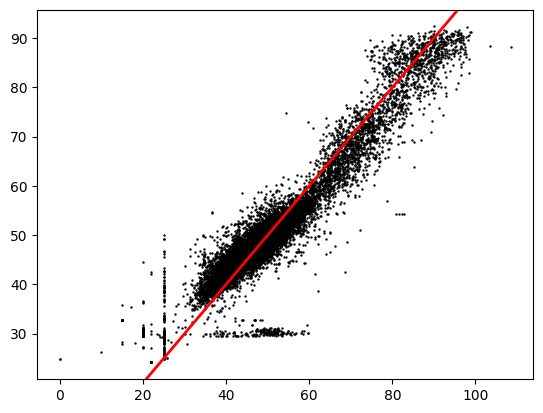

Testing Prediction Evaluation: 

	MSE:  63.190985286121425
	RMSE:  7.949275771170694
	MAE:  5.996301737018487
	R2:  0.6273056259209608


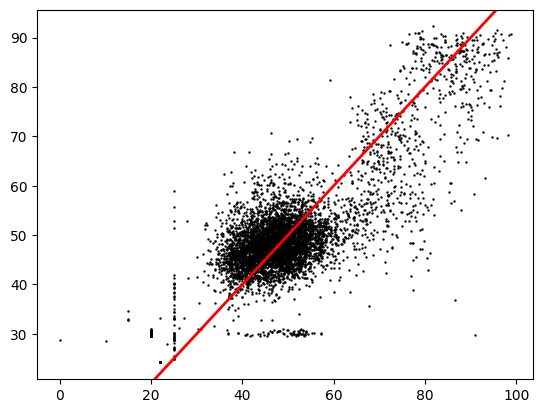

In [12]:
best_model = regressor_pipline('Multiple Layer Perceptron', x_train, y_train,
                  x_test, y_test, MLPRegressor(activation='logistic', 
                                               hidden_layer_sizes=(300,),
                                               learning_rate='constant',
                                               max_iter=100))

In [15]:
import random

predictions = best_model.predict(x_test)

num_experiments = 10 
number_comparisons = 1000

result_table = pd.DataFrame()

correct = []
incorrect = []
percent_correct = []

for experiment in range(1, num_experiments+1): 
    num_correct = 0 
    num_wrong = 0 
    i = 0 
    while i < 1000: 
        a = random.randint(0, len(predictions)-1)
        b = random.randint(0, len(predictions)-1)
        
        if a != b: 
            if y_test[a] >= y_test[b] and predictions[a] >= predictions[b]: 
                num_correct += 1 
            elif y_test[a] < y_test[b] and predictions[a] < predictions[b]: 
                num_correct += 1 
            else: 
                num_wrong += 1 
            
            i += 1 
            
    print('Experiment ' + str(experiment) + ':', num_correct)
            
    correct.append(num_correct)
    incorrect.append(num_wrong)
    percent_correct.append(num_correct//10)
    
    
result_table['Experiment #'] = range(1, num_experiments+1)
result_table['Correct'] = correct
result_table['Wrong'] = incorrect
result_table['Percent Correct'] = percent_correct
    
result_table

Experiment 1: 683
Experiment 2: 712
Experiment 3: 713
Experiment 4: 701
Experiment 5: 709
Experiment 6: 693
Experiment 7: 703
Experiment 8: 698
Experiment 9: 717
Experiment 10: 714


,Experiment #,Correct,Wrong,Percent Correct
0,1,683,317,68
1,2,712,288,71
2,3,713,287,71
3,4,701,299,70
4,5,709,291,70
5,6,693,307,69
6,7,703,297,70
7,8,698,302,69
8,9,717,283,71
9,10,714,286,71


In [16]:
np.mean(result_table['Percent Correct'])

70.0